# Experiments

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk, load_MLCup
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping

Preparation: Loading MLCup Dataset

In [2]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)



(1485, 9)
(1485, 2)
(529, 9)


 ## Learning step

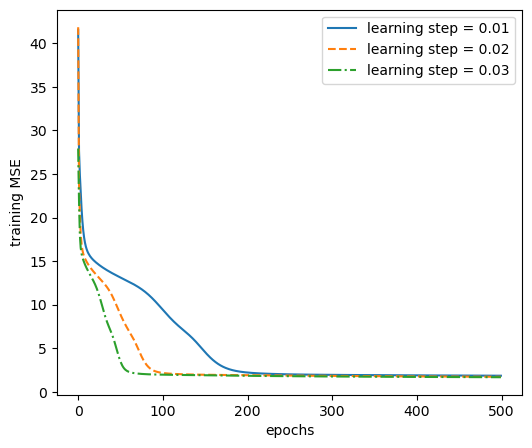

In [119]:
fig, ax1 = plt.subplots(figsize = (6,5))
linestyles = ['-', '--', '-.', ':']
for i, step in enumerate([0.01, 0.02, 0.03]):
    
    mlp = MLP([40,20], 9, 2, task = "regression", activation_function = 'sigm')
    mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 250, step = step, momentum = 0.5, patience = 500)
    ax1.plot(mlp.learning_curve, linestyles[i],  label = 'learning step = ' + str(step))
    
    
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('training MSE')
    
ax1.legend()

## Momentum

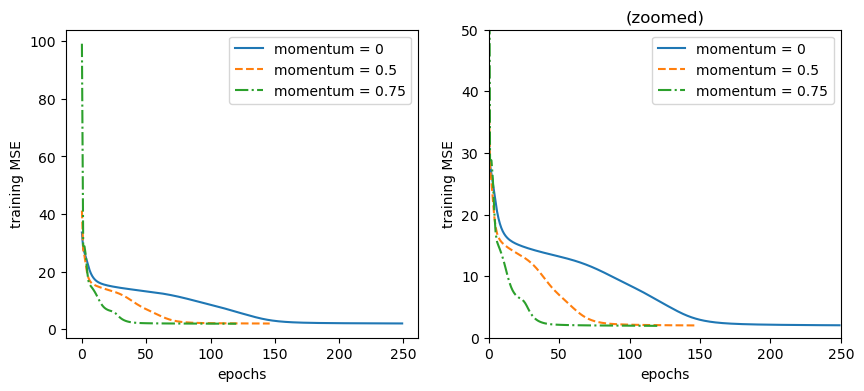

In [121]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))
linestyles = ['-', '--', '-.', ':']
for i, momentum in enumerate([0,0.5,0.75]):
    
    mlp = MLP([60,20], 9, 2, task = "regression", activation_function = 'sigm')
    mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 256, step = 0.02, 
            momentum = momentum)
    ax1.plot(mlp.learning_curve, linestyles[i],  label = 'momentum = ' + str(momentum))
    ax2.plot(mlp.learning_curve, linestyles[i],  label = 'momentum = ' + str(momentum))
    
    ax2.set_xbound(lower = 0, upper = 250)
    ax2.set_ybound(lower = 0, upper = 50)
    
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('training MSE')
    
    ax2.set_title('(zoomed)')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('training MSE')
    
    ax2.margins()
    
ax1.legend()
ax2.legend()

## Nesterov

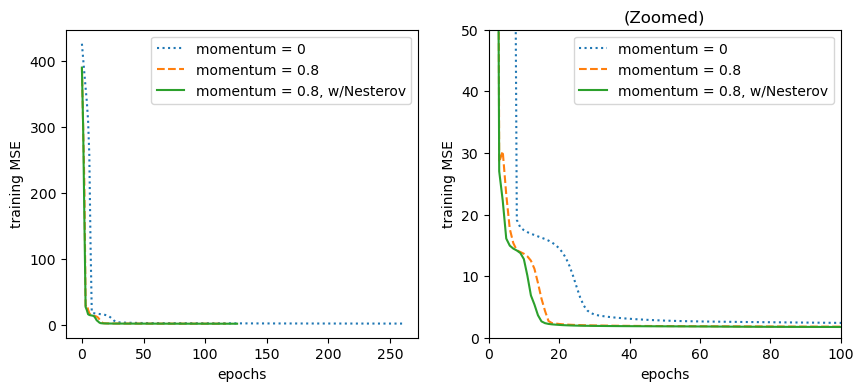

In [71]:
linestyles = [':', '--', '-']

fig, (ax,axz) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

mlp = MLP([40,20], 9, 2, task = "regression", activation_function = 'relu')

mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 250, step = 0.005, 
            momentum = 0, Nesterov = False)
ax.plot(mlp.learning_curve, linestyles[0],  label = 'momentum = 0')
axz.plot(mlp.learning_curve, linestyles[0],  label = 'momentum = 0')

momentum = 0.8
mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 250, step = 0.005, 
            momentum = momentum, Nesterov = False)
ax.plot(mlp.learning_curve, linestyles[1],  label = 'momentum = ' + str(momentum))
axz.plot(mlp.learning_curve, linestyles[1],  label = 'momentum = ' + str(momentum))

mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 250, step = 0.005, 
            momentum = momentum, Nesterov = True)
ax.plot(mlp.learning_curve, linestyles[2],  label = 'momentum = ' + str(momentum) + ', w/Nesterov')
axz.plot(mlp.learning_curve, linestyles[2],  label = 'momentum = ' + str(momentum) + ', w/Nesterov')

ax.set_xlabel('epochs')
ax.set_ylabel('training MSE')
ax.legend()

axz.set_xbound(lower = 0, upper = 100)
axz.set_ybound(lower = 0, upper = 50)
axz.set_title("(Zoomed)")
    
axz.set_xlabel('epochs')
axz.set_ylabel('training MSE')
axz.legend()


## Regularization

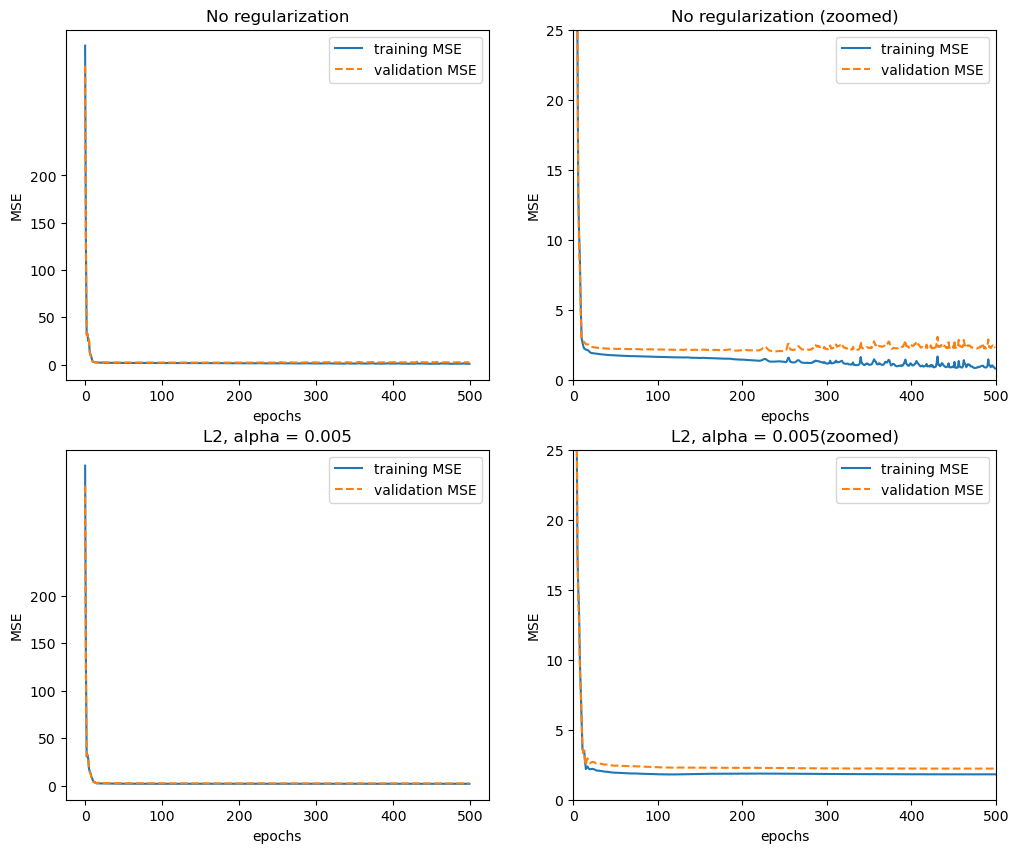

In [70]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

linestyles = ['-', '--']
mlp = MLP([40,20], 9, 2, task = "regression", activation_function = 'sigm')
mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 250, step = 0.1, momentum = 0.5, patience = 1000, adaptive_gradient = False)
ax1.plot(mlp.learning_curve, linestyles[0],  label = 'standard')
ax2.plot(mlp.learning_curve, linestyles[0],  label = 'standard')
mlp.fit(X_train, y_train, n_epochs = 500, batch_size = 250, step = 0.1, momentum = 0.5, patience = 1000, adaptive_gradient = True)
ax1.plot(mlp.learning_curve, linestyles[1],  label = 'adagrad')
ax1.legend()
ax2.plot(mlp.learning_curve, linestyles[1],  label = 'adagrad')
ax2.legend()

ax2.set_xbound(lower = 0, upper = 500)
ax2.set_ybound(lower = 0, upper = 5)
ax2.set_title('(zoomed)')

ax1.set_xlabel('epochs')
ax1.set_ylabel('training MSE')
ax2.set_xlabel('epochs')
ax2.set_ylabel('training MSE')
    

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(12,10))

for i,alpha_l2 in enumerate([0,0.05]):
    mlp = MLP([400,200,100], 9, 2, task = "regression", activation_function = 'relu')
    mlp.fit(X_train, y_train, n_epochs = 500, step = 0.03, batch_size = 500,
            momentum = 0.7, regularization = "l2", alpha_l2 = alpha_l2, patience = 1000)
    
    axs[i][0].plot(mlp.learning_curve, '-', label = "training MSE")
    axs[i][0].plot(mlp.validation_curve, '--', label = "validation MSE")
    
    axs[i][1].plot(mlp.learning_curve, '-', label = "training MSE")
    axs[i][1].plot(mlp.validation_curve, '--', label = "validation MSE")
    
    axs[i][1].set_ybound(lower = 0, upper = 25)
    axs[i][1].set_xbound(lower = 0, upper = 500)
    
axs[0][0].set_title('No regularization')
axs[1][0].set_title('L2, alpha = 0.005')
axs[0][1].set_title('No regularization (zoomed)')
axs[1][1].set_title('L2, alpha = 0.005(zoomed)')

axs[0][0].set_xlabel('epochs')
axs[0][0].set_ylabel('MSE')
axs[0][1].set_xlabel('epochs')
axs[0][1].set_ylabel('MSE')
axs[1][0].set_xlabel('epochs')
axs[1][0].set_ylabel('MSE')
axs[1][1].set_xlabel('epochs')
axs[1][1].set_ylabel('MSE')

axs[0][0].set_yticks([0,50,100,150,200])
axs[1][0].set_yticks([0,50,100,150,200])
axs[0][1].set_yticks([0,5,10,15,20,25])
axs[1][1].set_yticks([0,5,10,15,20,25])


axs[0][0].legend()
axs[1][0].legend()
axs[0][1].legend()
axs[1][1].legend()


## Rprop

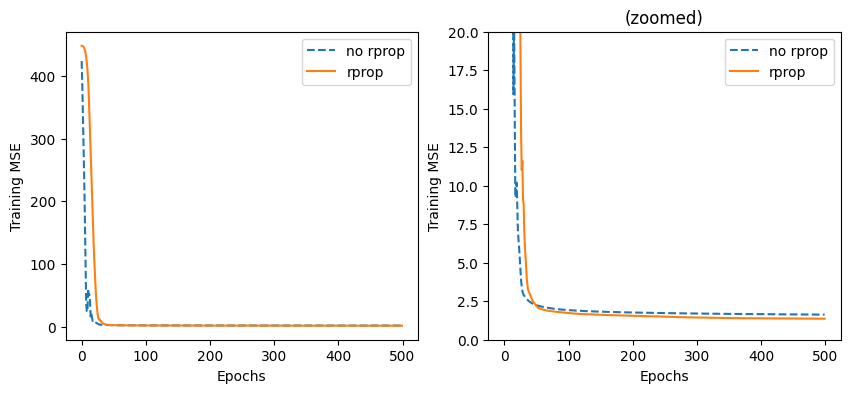

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize= (10,4))

mlp = MLP([40,20], 9, 2, task = "regression", activation_function = 'tanh')
mlp.fit(X_train, y_train, n_epochs = 500, step = 0.03, momentum = 0.7, regularization = "l2", alpha_l2 = 0.0005, alpha_l1 = 0.0005, patience = 500)
ax1.plot(mlp.learning_curve, linestyle = '--', label = "no rprop")
ax2.plot(mlp.learning_curve, linestyle = '--', label = "no rprop")

mlp = MLP([40,20], 9, 2, task = "regression", activation_function = 'tanh')
mlp.fit(X_train, y_train, n_epochs = 500, step = 0.03, rprop = True,  regularization = "l2", alpha_l2 = 0.0005, alpha_l1 = 0.0005, patience = 500)
ax1.plot(mlp.learning_curve, label = "rprop")
ax2.plot(mlp.learning_curve, label = "rprop")

ax2.set_ybound(0,20)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Training MSE")
ax2.set_title("(zoomed)")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training MSE")
    
ax1.legend()
ax2.legend()


## Adaptive Gradient

Text(0, 0.5, 'Training MSE')

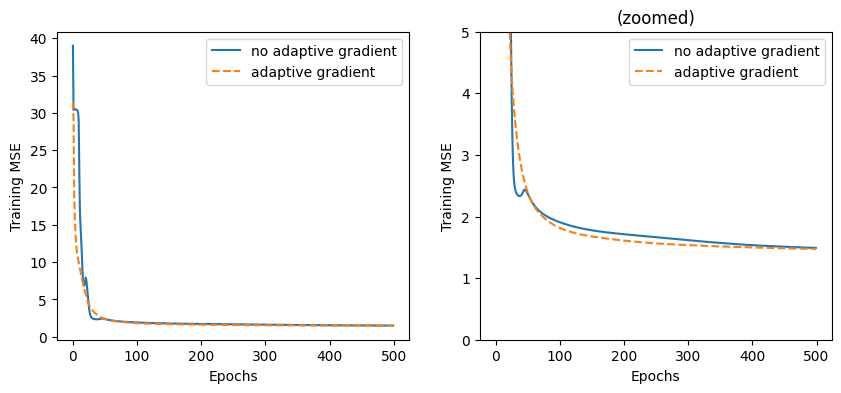

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4) )
mlp = MLP([40,20], 9, 2, task = "regression", activation_function = 'sigm')
mlp.fit(X_train, y_train, n_epochs = 500, step = 0.1, momentum = 0.5, batch_size = 250, patience = 2000)

ax1.plot(mlp.learning_curve, label = "no adaptive gradient")
ax2.plot(mlp.learning_curve, label = "no adaptive gradient")

mlp.fit(X_train, y_train, n_epochs = 500, step = 0.1, momentum = 0.5, batch_size = 250, adaptive_gradient = True, patience = 2000)
ax1.plot(mlp.learning_curve, label = "adaptive gradient", linestyle = '--')
ax2.plot(mlp.learning_curve, label = "adaptive gradient", linestyle = '--')

ax1.legend()
ax2.legend()
ax2.set_title("(zoomed)")
ax2.set_ybound(0,5)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training MSE")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Training MSE")
